<a href="https://colab.research.google.com/github/itz-sayak/Tic-tac-toe/blob/main/Trading_using_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install stable-baselines3[extra] gym-anytrading gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.8 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=acf0752ffc3fd8de20fa4849d1ebef0e922e98d95ad166fe8f6bffc71daa3682
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [7]:
!pip install sb3-contrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.9 MB/s eta 0:00:00


In [14]:
import gym
import gym_anytrading

from sb3_contrib import RecurrentPPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [75]:
df = pd.read_csv('/content/Download Data - STOCK_US_XNYS_GME.csv')

In [76]:
df.head()

,Date,Open,High,Low,Close,Volume
0,08/01/2023,21.95,22.00,21.26,21.50,"2,574,804"
1,07/31/2023,22.00,22.38,21.85,22.20,"1,975,391"
2,07/28/2023,22.02,22.49,21.79,21.93,"2,647,747"
3,07/27/2023,22.94,23.49,22.13,22.22,"3,370,913"
4,07/26/2023,22.70,22.99,22.48,22.70,"1,489,152"


In [77]:
df.replace(',', '', regex=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [78]:
df

,Date,Open,High,Low,Close,Volume
0,2023-08-01,21.95,22.00,21.26,21.50,2574804
1,2023-07-31,22.00,22.38,21.85,22.20,1975391
2,2023-07-28,22.02,22.49,21.79,21.93,2647747
3,2023-07-27,22.94,23.49,22.13,22.22,3370913
4,2023-07-26,22.70,22.99,22.48,22.70,1489152
...,...,...,...,...,...,...
247,2022-08-05,37.37,40.43,36.56,40.02,8124235
248,2022-08-04,38.34,39.89,37.89,38.36,5421500
249,2022-08-03,36.22,38.01,36.00,37.93,5186482
250,2022-08-02,35.90,36.80,35.12,35.84,4697134


In [79]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-01,21.95,22.00,21.26,21.50,2574804
2023-07-31,22.00,22.38,21.85,22.20,1975391
2023-07-28,22.02,22.49,21.79,21.93,2647747
2023-07-27,22.94,23.49,22.13,22.22,3370913
2023-07-26,22.70,22.99,22.48,22.70,1489152


In [80]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [45]:
df = df.astype({
    'Open': float,
    'High': float,
    'Low': float,
    'Close': float,
    'Volume': float
})

In [81]:
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(


In [82]:
env.signal_features

array([[ 2.150e+01,  0.000e+00],
       [ 2.220e+01,  7.000e-01],
       [ 2.193e+01, -2.700e-01],
       [ 2.222e+01,  2.900e-01],
       [ 2.270e+01,  4.800e-01],
       [ 2.285e+01,  1.500e-01],
       [ 2.304e+01,  1.900e-01],
       [ 2.218e+01, -8.600e-01],
       [ 2.291e+01,  7.300e-01],
       [ 2.317e+01,  2.600e-01],
       [ 2.308e+01, -9.000e-02],
       [ 2.282e+01, -2.600e-01],
       [ 2.297e+01,  1.500e-01],
       [ 2.346e+01,  4.900e-01],
       [ 2.344e+01, -2.000e-02],
       [ 2.391e+01,  4.700e-01],
       [ 2.354e+01, -3.700e-01],
       [ 2.271e+01, -8.300e-01],
       [ 2.283e+01,  1.200e-01],
       [ 2.390e+01,  1.070e+00],
       [ 2.491e+01,  1.010e+00],
       [ 2.425e+01, -6.600e-01],
       [ 2.490e+01,  6.500e-01],
       [ 2.498e+01,  8.000e-02],
       [ 2.358e+01, -1.400e+00],
       [ 2.302e+01, -5.600e-01],
       [ 2.370e+01,  6.800e-01],
       [ 2.432e+01,  6.200e-01],
       [ 2.443e+01,  1.100e-01],
       [ 2.458e+01,  1.500e-01],
       [ 2

In [48]:
env.action_space

Discrete(2)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(


info {'total_reward': -2.739999999999995, 'total_profit': 0.674998980186921, 'position': 1}


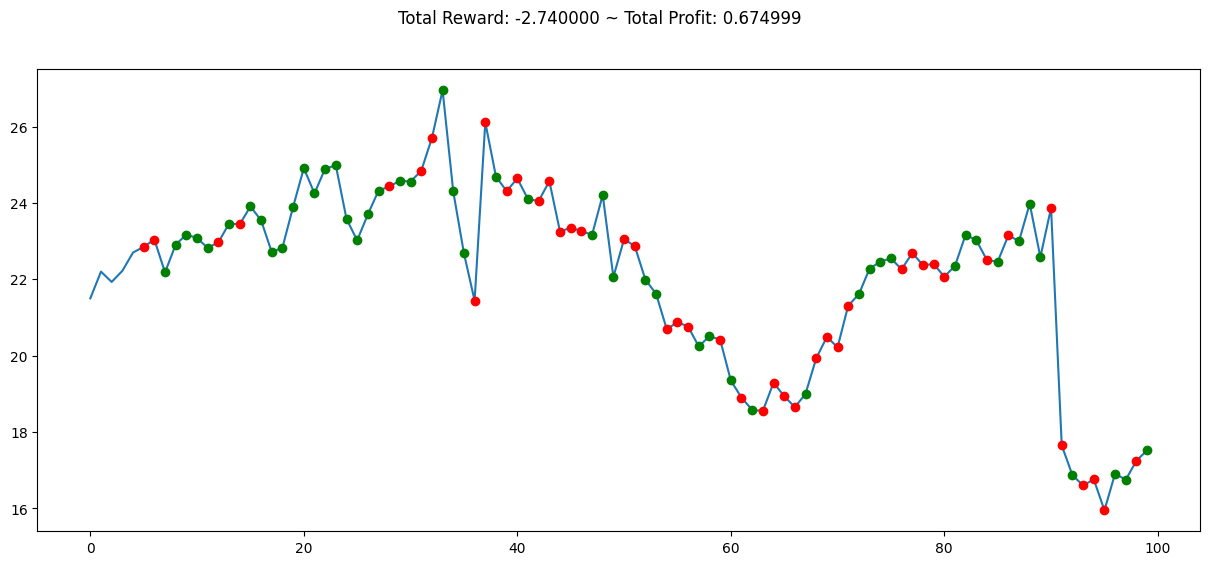

In [83]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [84]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [85]:
model = RecurrentPPO('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    time_elapsed         | 1431      |
|    total_timesteps      | 114560    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000157 |
|    explained_variance   | -4.49     |
|    learning_rate        | 0.0003    |
|    loss                 | 2.64e-08  |
|    n_updates            | 8940      |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 8.28e-08  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 80        |
|    iterations           | 896       |
|    time_elapsed         | 1433      |
|    total_timesteps      | 114688    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0

KeyboardInterrupt: ignored

In [ ]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 1.0842257538910505, 'position': 1}


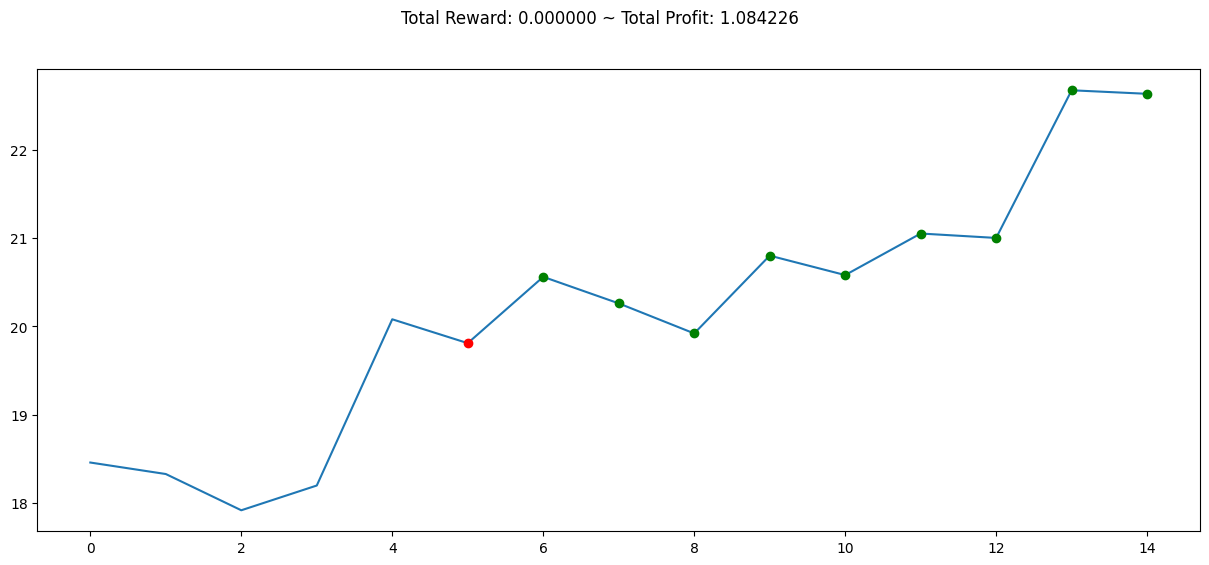

In [92]:
env = gym.make('stocks-v0', df=df, frame_bound=(150,160), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [89]:
df.count()

Open      252
High      252
Low       252
Close     252
Volume    252
dtype: int64